# **Prelim Skills Exam** <br>

**Name**: Mj Spencer Almodiel <br>
**Instructor**: Engr. Roman Richard <br>
**Date Performed**: 3/12/24

1. Build and train a CNN model from a scratch.  Apply different regularization techniques and data preprocessing to reduce overfitting.

2.  Plot the training and validation loss and accuracy. The target accuracy is 85 and above.

3.  Use the assigned pre-trained model and fine-tuned it. 

4. Build and train a CNN model using the modified pretrained model.

5. Plot the training and validation loss and accuracy. The target accuracy is 95 and above.

6. Use the classification report, confusion matrix and ROC over AUC metric to evaluate also the performance of the scratch and using pre-trained mode

### Import the data and apply data preprocessing techniques

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import glob # to be used on search files
%matplotlib inline

In [29]:
xray_df = pd.read_csv(r"archive\Data_Entry_2017.csv")
xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


**Remove unnecessary columns**

In [30]:
xray_df = xray_df[['Image Index', 'Finding Labels', 'Follow-up #', 'Patient Age', 'Patient Gender']]

In [31]:
xray_df

,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender
0,00000001_000.png,Cardiomegaly,0,58,M
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,M
2,00000001_002.png,Cardiomegaly|Effusion,2,58,M
3,00000002_000.png,No Finding,0,81,M
4,00000003_000.png,Hernia,0,81,F
...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,39,M
112116,00030802_000.png,No Finding,0,29,M
112117,00030803_000.png,No Finding,0,42,F
112118,00030804_000.png,No Finding,0,30,F


- We can see that in Patient Age column, the max value in age is 414. Let's clean and only get age under 100.

In [32]:
xray_df = xray_df[xray_df['Patient Age'] < 100]
xray_df.describe()

,Follow-up #,Patient Age
count,112104.000000,112104.000000
mean,8.574172,46.872574
std,15.406734,16.598152
min,0.000000,1.000000
25%,0.000000,35.000000
50%,3.000000,49.000000
75%,10.000000,59.000000
max,183.000000,95.000000


In [33]:
xray_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     112104 non-null  object
 1   Finding Labels  112104 non-null  object
 2   Follow-up #     112104 non-null  int64 
 3   Patient Age     112104 non-null  int64 
 4   Patient Gender  112104 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.1+ MB


Change **"Patient Gender"** to binary values. 1 for male and 0 for female.

In [34]:
xray_df['Patient Gender'] = xray_df['Patient Gender'].replace({'M': 1, 'F': 0})
xray_df

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender
0,00000001_000.png,Cardiomegaly,0,58,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,1
2,00000001_002.png,Cardiomegaly|Effusion,2,58,1
3,00000002_000.png,No Finding,0,81,1
4,00000003_000.png,Hernia,0,81,0
...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,39,1
112116,00030802_000.png,No Finding,0,29,1
112117,00030803_000.png,No Finding,0,42,0
112118,00030804_000.png,No Finding,0,30,0


In [35]:
image_paths = {os.path.basename(x): x for x in glob.glob(os.path.join('archive/images*/*/*.png'))} 
len(image_paths)

112120

In [36]:
xray_df['path'] = xray_df['Image Index'].map(image_paths.get)
xray_df.head(5)

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender,path
0,00000001_000.png,Cardiomegaly,0,58,1,archive\images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,1,archive\images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,58,1,archive\images_001\images\00000001_002.png
3,00000002_000.png,No Finding,0,81,1,archive\images_001\images\00000002_000.png
4,00000003_000.png,Hernia,0,81,0,archive\images_001\images\00000003_000.png


- First thing I noticed within the data is that there are some rows that have multiple labels. I should convert this to binary values to maintain its multiple label characteristic. 

In [37]:
from itertools import chain
labels = np.unique(list(chain(*xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))    # splits the findings by |

# lets remove the '' value
labels = [x for x in labels if x != 'No Finding']
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [38]:
xray_df['Finding Labels'].value_counts()[:20]



No Finding                           60353
Infiltration                          9546
Atelectasis                           4214
Effusion                              3955
Nodule                                2705
Pneumothorax                          2193
Mass                                  2139
Effusion|Infiltration                 1603
Atelectasis|Infiltration              1350
Consolidation                         1310
Atelectasis|Effusion                  1165
Pleural_Thickening                    1126
Cardiomegaly                          1093
Emphysema                              892
Infiltration|Nodule                    829
Atelectasis|Effusion|Infiltration      737
Fibrosis                               727
Edema                                  627
Cardiomegaly|Effusion                  484
Consolidation|Infiltration             441
Name: Finding Labels, dtype: int64

- As you can see, since have over 120k+ of data. There are some rows that have multiple findings.

- Let's try only use the labels that are greater than 1000 instances. Since there are some labels that have 3 findings but not enough compared to the size of whole dataset. We can change this later if the model's performance is good.

In [39]:
minCount = 1000

# Count the occurrences of each label
label_counts = {}
for label in labels:
    label_counts[label] = (xray_df['Finding Labels'].str.contains(label)).sum()

# Filter the labels that occur more than 1000 times
filtered_labels = [label for label, count in label_counts.items() if count > 1000]
filtered_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [40]:
for label, count in label_counts.items():
    if count > 1000:
        print(label, count)

Atelectasis 11558
Cardiomegaly 2776
Consolidation 4667
Edema 2302
Effusion 13316
Emphysema 2516
Fibrosis 1686
Infiltration 19891
Mass 5779
Nodule 6331
Pleural_Thickening 3384
Pneumonia 1430
Pneumothorax 5301


- Let's transform the labels to 0 and 1. So that it can be trainable. But since this problem is a multilabel classification, there are instances that 1 or more findings can be concluded. 

In [41]:
label_encoding = {label: idx for idx, label in enumerate(filtered_labels)}

def transform_label(label_string):
    labels = label_string.split('|')
    binary_array = np.zeros(len(filtered_labels), dtype=np.int)
    for label in labels:
        if label in label_encoding:
            idx = label_encoding[label]
            binary_array[idx] = 1
    return binary_array

In [42]:
xray_df['Latest Labels'] = xray_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender,path,Latest Labels
0,00000001_000.png,Cardiomegaly,0,58,1,archive\images_001\images\00000001_000.png,[Cardiomegaly]
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,1,archive\images_001\images\00000001_001.png,"[Cardiomegaly, Emphysema]"
2,00000001_002.png,Cardiomegaly|Effusion,2,58,1,archive\images_001\images\00000001_002.png,"[Cardiomegaly, Effusion]"
3,00000002_000.png,No Finding,0,81,1,archive\images_001\images\00000002_000.png,[No Finding]
4,00000003_000.png,Hernia,0,81,0,archive\images_001\images\00000003_000.png,[Hernia]


In [44]:
for lb in labels:
    xray_df[lb] = xray_df['Finding Labels'].map(lambda x : 1.0 if lb in x else 0)

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender,path,Latest Labels,Atelectasis,Cardiomegaly,Consolidation,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,58,1,archive\images_001\images\00000001_000.png,[Cardiomegaly],0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,1,archive\images_001\images\00000001_001.png,"[Cardiomegaly, Emphysema]",0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,58,1,archive\images_001\images\00000001_002.png,"[Cardiomegaly, Effusion]",0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,81,1,archive\images_001\images\00000002_000.png,[No Finding],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,81,0,archive\images_001\images\00000003_000.png,[Hernia],0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
xray_df.to_csv('cleaned_xray.csv')

### Split into training and testing data <br>
- I will use stratify to deal with data imbalance 

In [47]:
from sklearn.model_selection import train_test_split

training_df, testing_df = train_test_split(xray_df, 
                                   test_size = 0.2, 
                                   stratify = xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', training_df.shape[0], 'validation', testing_df.shape[0])

train 89683 validation 22421


### Apply Data Generator in images

In [48]:
import tensorflow as tf

In [49]:
strategy = tf.distribute.MirroredStrategy()
print('DEVICES AVAILABLE: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
DEVICES AVAILABLE: 1


In [50]:
AUTOTUNE = tf.data.AUTOTUNE
IMAGE_SIZE = 128
BATCH_SIZE_PER_REPLICA = 32

BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

In [51]:
from keras.preprocessing.image import ImageDataGenerator

core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [52]:
train_generator = core_idg.flow_from_dataframe(dataframe=training_df,
                                        directory=None,
                                        x_col = 'path',
                                        y_col = 'Latest Labels',
                                        class_mode = 'categorical',
                                        classes = labels,
                                        target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode = 'grayscale',
                                        batch_size = BATCH_SIZE,
                                        shuffle = True)
test_generator = core_idg.flow_from_dataframe(dataframe=testing_df,
                                        directory= None,
                                        x_col = 'path',
                                        y_col = 'Latest Labels',
                                        class_mode = 'categorical',
                                        classes = labels,
                                        target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode = 'grayscale',
                                        batch_size = 256)

Found 41401 validated image filenames belonging to 14 classes.
Found 10350 validated image filenames belonging to 14 classes.


### Convert dataframes to tensorflow dataset

In [53]:
train_data = tf.data.Dataset.from_generator(
                lambda: train_generator,
                output_types = (tf.float32, tf.float32), 
                output_shapes = ([None,IMAGE_SIZE,IMAGE_SIZE,1], [None,len(labels)]))


test_data = tf.data.Dataset.from_generator(
                lambda: test_generator,
                output_types=(tf.float32, tf.float32), 
                output_shapes=([None,IMAGE_SIZE,IMAGE_SIZE,1], [None,len(labels)]))

In [54]:
one_batch_samples = next(iter(train_data))
image_samples, __ = one_batch_samples

### Rescale image so that the model can handle all inputs consistently

In [55]:
rescaled_layer = tf.keras.layers.Rescaling(1. / 255)

In [56]:
scale_train_data = train_data.map(lambda x,y: (rescaled_layer(x),y),num_parallel_calls = AUTOTUNE)
scale_test_data = test_data.map(lambda x,y: (rescaled_layer(x),y),num_parallel_calls = AUTOTUNE)

### Remove background <br>
- Removing background will reduce the noise within the data.

In [57]:
def background_rm(image):   # this function gets all pixel values that are greater than 0.
    img_list = []
    for i in range(image.shape[0]):
        try:
            img = image[i]

            sumOfCols = np.sum(img, axis=0)
            sumOfRows = np.sum(img, axis=1)

            for i in range(len(sumOfCols)):
                if sumOfCols[i] > 0:
                    x1 = i
                    break

            for i in range(len(sumOfCols)-1,-1,-1):
                if sumOfCols[i] > 0:
                    x2 = i
                    break

            for i in range(len(sumOfRows)):
                if sumOfRows[i] > 0:
                    y1 = i
                    break

            for i in range(len(sumOfRows)-1,-1,-1):
                if sumOfRows[i] > 0:
                    y2 = i
                    break

            roi = img[y1:y2,x1:x2]
            roi = tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE) (roi)
            img_list.append(roi)
        except:
            img_list.append(img)

    return tf.convert_to_tensor(tf.stack(img_list))

In [58]:
"""
Using the Python function background_rm, this program does background removal
to input photos and incorporates it into a TensorFlow network for image preparation
inside a TensorFlow pipeline. The output is then returned, together with the original
label and processed image.
"""
def background_rm_tf(image,label):
    im_shape = image.shape
    [image,] = tf.py_function(background_rm, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

In [59]:
rm_background_train_data = scale_train_data.map(background_rm_tf,num_parallel_calls = AUTOTUNE)
rm_background_test_data = scale_test_data.map(background_rm_tf,num_parallel_calls = AUTOTUNE)

### Remove noise 

In [60]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma
from skimage import img_as_float

In [61]:
# We will be removing erroneous values within the images.
def denoise(image):
    return denoise_tv_chambolle(img_as_float(image), weight=0.01)

def denoise_tf(image,label):
    im_shape = image.shape
    [image,] = tf.py_function(denoise, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

In [62]:
rm_noise_train_data = rm_background_train_data.map(denoise_tf,num_parallel_calls = AUTOTUNE)
rm_noise_test_data = rm_background_test_data.map(denoise_tf,num_parallel_calls = AUTOTUNE)

## Build a CNN model from scratch.

In [107]:
train_data = rm_noise_train_data.map(lambda x,y: (tf.image.grayscale_to_rgb(x),y)).cache().prefetch(buffer_size = AUTOTUNE)
valid_data = rm_noise_test_data.map(lambda x,y: (tf.image.grayscale_to_rgb(x),y)).cache().prefetch(buffer_size = AUTOTUNE)

In [64]:
testing_df.columns[6:]

Index(['Latest Labels', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [65]:
test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=testing_df,
                                        directory=None,
                                        x_col = 'path',
                                        y_col = 'Latest Labels',
                                        class_mode = 'categorical',
                                        target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode = 'rgb',
                                        classes= labels,
                                        batch_size = 1024))

Found 10350 validated image filenames belonging to 14 classes.


In [66]:
test_X_normal = tf.keras.layers.Rescaling(1./255) (test_X)
test_Y_normal = tf.keras.layers.Rescaling(1./255) (test_Y)
test_X_normal = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_X_normal))

ValueError: Last dimension of a grayscale image should be size 1.

In [ ]:
test_X_process = test_X.copy()

test_X_process = background_rm(test_X_process)
test_X_process = tf.keras.layers.Rescaling(1./255) (test_X_process)
test_X_process = denoise(test_X_process)

test_X_process = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_X_process))

In [67]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten,BatchNormalization,Input,Conv2D,MaxPooling2D,concatenate,Conv2DTranspose

In [76]:
from keras.models import Sequential
# Define the input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)  # Assuming RGB images of size 512x512

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(14, activation='sigmoid'))  # 14 output neurons with sigmoid activation for multilabel classification

# Compile the model
model.compile(optimizer= tf.keras.optimizers.legacy.Adam(lr=0.0005),
              loss='binary_crossentropy',  # Binary cross-entropy for multilabel classification
              metrics=['binary_accuracy', tf.keras.metrics.AUC(), 'accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Train the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.0005), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', tf.keras.metrics.AUC()])

In [68]:
steps_per_epoch = training_df.shape[0]  // BATCH_SIZE
steps_per_epoch

2802

In [69]:
testing_df.shape

(22421, 21)

In [110]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Metric to monitor, e.g., validation loss
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores the model weights from the epoch with the best value of the monitored metric
)

In [79]:
model_hist = model.fit(train_data, 
            steps_per_epoch = 750,
            validation_data = (test_X, test_Y),
            epochs = 5,
            verbose = 1,
            )

Epoch 1/5


750/750 [==============================] - 258s 344ms/step - loss: 0.3054 - binary_accuracy: 0.8879 - auc_2: 0.7580 - accuracy: 0.2250 - val_loss: 5.4433 - val_binary_accuracy: 0.8867 - val_auc_2: 0.5533 - val_accuracy: 0.2363
Epoch 2/5
750/750 [==============================] - 257s 343ms/step - loss: 0.3001 - binary_accuracy: 0.8877 - auc_2: 0.7732 - accuracy: 0.2382 - val_loss: 6.0018 - val_binary_accuracy: 0.8839 - val_auc_2: 0.5597 - val_accuracy: 0.2695
Epoch 3/5
750/750 [==============================] - 248s 331ms/step - loss: 0.2984 - binary_accuracy: 0.8880 - auc_2: 0.7758 - accuracy: 0.2429 - val_loss: 12.2004 - val_binary_accuracy: 0.8850 - val_auc_2: 0.5312 - val_accuracy: 0.2852
Epoch 4/5
750/750 [==============================] - 256s 342ms/step - loss: 0.2954 - binary_accuracy: 0.8886 - auc_2: 0.7828 - accuracy: 0.2524 - val_loss: 17.9995 - val_binary_accuracy: 0.8844 - val_auc_2: 0.5097 - val_accuracy: 0.2617
Epoch 5/5
750/750 [==============================] - 244s 32

### Save model to JSON 

In [70]:
from tensorflow.keras.models import model_from_json

def save_model(model, save_name):
    model_json = model.to_json()
    
    with open(f"{save_name}.json", 'w') as json_file:
        json_file.write(model_json)

    model.save_weights(f"{save_name}.h5")
    print('Model saved!')


def load_model(model_name):
    json_file = open(f"{model_name}.json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()

    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(f"{model_name}.h5")
    print("Load model success!")
    return loaded_model

In [85]:
save_model(model, "self_built_model")

Model saved!


### Load model

In [86]:
loaded_model = load_model("self_built_model")

Load model success!


### Evaluate model

In [87]:
loaded_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for multilabel classification
              metrics=['binary_accuracy', tf.keras.metrics.AUC()])

score = loaded_model.evaluate(test_X_normal, test_Y_normal, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

binary_accuracy: 88.16%


In [88]:
y_pred_model_normal = loaded_model.predict(test_X_normal)

 1/32 [..............................] - ETA: 2s

32/32 [==============================] - 0s 9ms/step


### Plot self-built model's performance

0.6580416808925912


Text(0.5, 1.0, 'Self-built model ROC AUC')

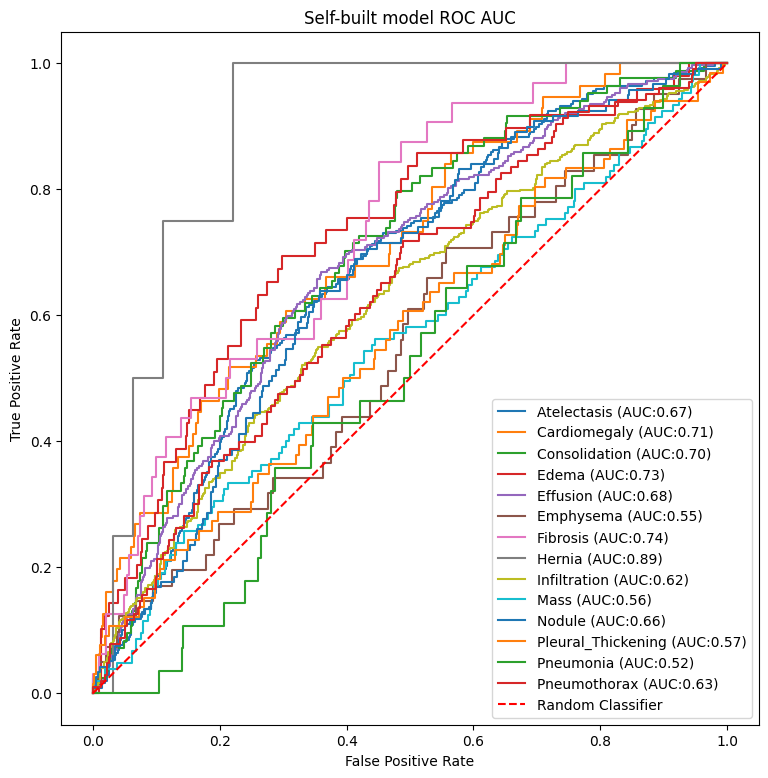

In [89]:
from sklearn.metrics import roc_curve, auc,f1_score

fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
mean_auc_dense121_normal = 0
for (idx, c_label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), y_pred_model_normal[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    mean_auc_dense121_normal += auc(fpr, tpr)

mean_auc_dense121_normal /= 14
print(mean_auc_dense121_normal)

# Plotting the diagonal line representing random classifier
c_ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')


c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
c_ax.set_title("Self-built model ROC AUC")

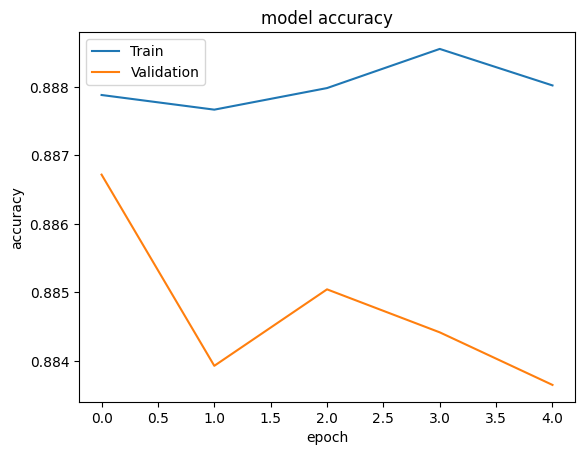

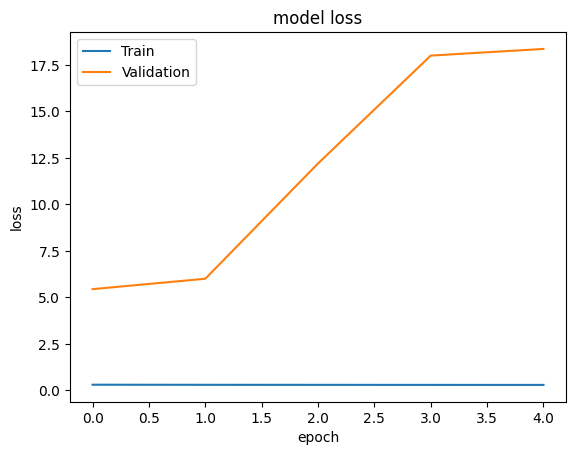

In [90]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_hist.history['binary_accuracy'])
plt.plot(model_hist.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Pre-trained model

#### Dense121

In [108]:
input = tf.keras.layers.Input([IMAGE_SIZE, IMAGE_SIZE, 3], dtype = tf.float32)

dense121 = tf.keras.applications.DenseNet121(include_top=False,weights="imagenet",pooling='avg')
dense121 = dense121(input,)

output = Dense(len(labels), activation = 'sigmoid') (dense121)

dense121_model = tf.keras.Model(inputs=[input], outputs=[output])
dense121_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense_6 (Dense)             (None, 14)                14350     
                                                                 
Total params: 7,051,854
Trainable params: 6,968,206
Non-trainable params: 83,648
_________________________________________________________________


In [109]:
dense121_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', tf.keras.metrics.AUC(), 'accuracy'])

In [110]:
dense_hist = dense121_model.fit(train_data, 
            steps_per_epoch = 50,
            epochs = 20,
            verbose = 1,
            validation_data= (test_X, test_Y),
            )

Epoch 1/20


50/50 [==============================] - 45s 693ms/step - loss: 0.3672 - binary_accuracy: 0.8610 - auc_8: 0.6957 - accuracy: 0.1994 - val_loss: 0.5669 - val_binary_accuracy: 0.7538 - val_auc_8: 0.7085 - val_accuracy: 0.1660
Epoch 2/20
50/50 [==============================] - 27s 556ms/step - loss: 0.3160 - binary_accuracy: 0.8850 - auc_8: 0.7446 - accuracy: 0.2138 - val_loss: 324.2725 - val_binary_accuracy: 0.4879 - val_auc_8: 0.5776 - val_accuracy: 0.0459
Epoch 3/20
50/50 [==============================] - 30s 605ms/step - loss: 0.3136 - binary_accuracy: 0.8847 - auc_8: 0.7520 - accuracy: 0.2087 - val_loss: 1.6072 - val_binary_accuracy: 0.8712 - val_auc_8: 0.7046 - val_accuracy: 0.2471
Epoch 4/20
50/50 [==============================] - 31s 631ms/step - loss: 0.3124 - binary_accuracy: 0.8877 - auc_8: 0.7387 - accuracy: 0.2125 - val_loss: 0.3051 - val_binary_accuracy: 0.8859 - val_auc_8: 0.7719 - val_accuracy: 0.2363
Epoch 5/20
50/50 [==============================] - 33s 672ms/step - 

Let's see the performance using pre-trained model

In [111]:
y_pred_dense121_normal = dense121_model.predict(test_X_normal)

32/32 [==============================] - 3s 37ms/step


## Save pre-trained model

In [102]:
save_model(dense121_model, "dense121")
loaded_pre_t = load_model("dense121")

Model saved!
Load model success!


0.6954590913324309


Text(0, 0.5, 'True Positive Rate')

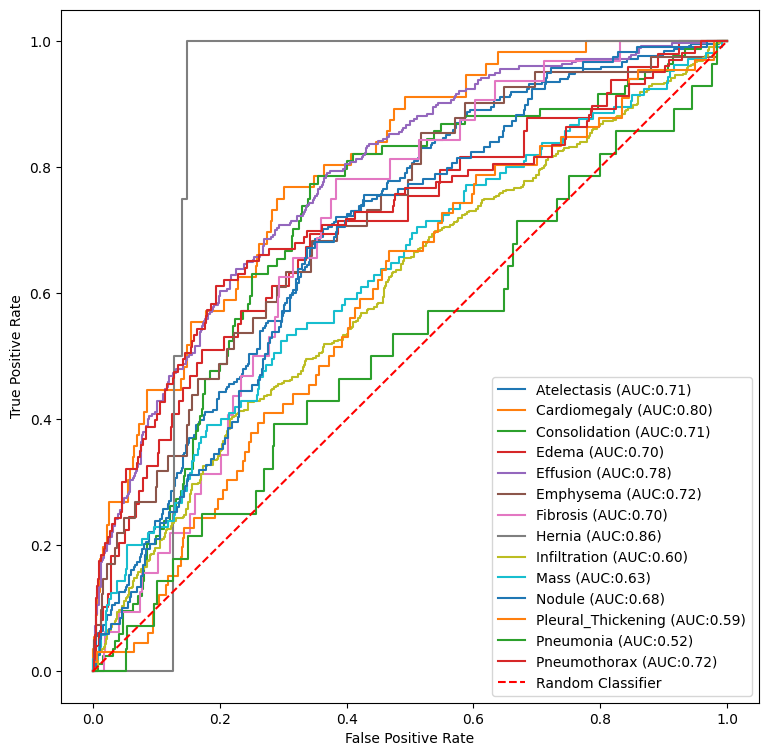

In [103]:
from sklearn.metrics import roc_curve, auc,f1_score
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
mean_auc_dense121_normal = 0
for (idx, c_label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), y_pred_dense121_normal[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    mean_auc_dense121_normal += auc(fpr, tpr)

mean_auc_dense121_normal /= 14
print(mean_auc_dense121_normal)

c_ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

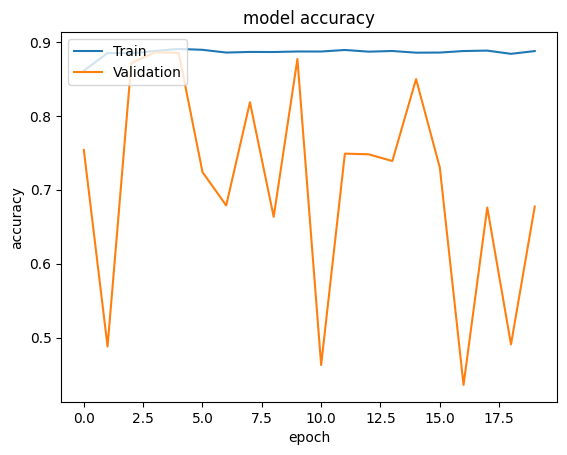

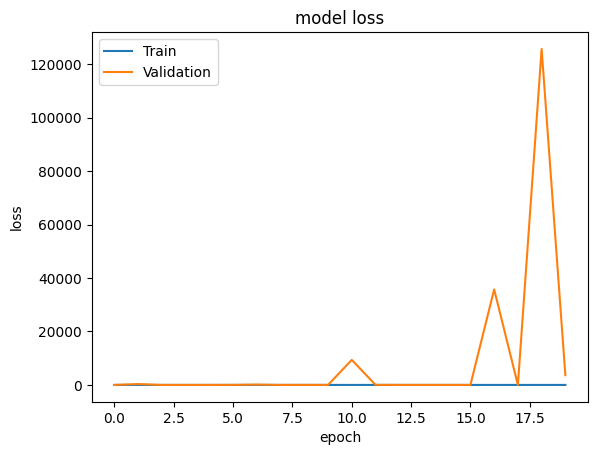

In [113]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(dense_hist.history['binary_accuracy'])
plt.plot(dense_hist.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(dense_hist.history['loss'])
plt.plot(dense_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Having knowledge about simple image then suddenly jumping to finding the patterns in x-ray images is the hardest part for me. Especially on how will I augment these images for the model to understand. The vast amount of data used in this notebook requires a lot of processing power to compute and time to spare. In conclusion, beginning from cat & dog detection would be nice instead of jumping to this kind of problem. The fact that multilabel classification is not addressed in any way throughout our preliminary period makes this skills exam even more challenging.

test